In [ ]:
import torch
import numpy as np
from model import SIREN
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from PIL import Image
from sphere_tracing import create_orthogonal_image

In [ ]:
MESH = 'armadillo_slice'
MODEL = 'model_best_30'
W0 = 30

LADO = 1024
SAMPLES = LADO ** 2
BORDES = [1, -1]
OFFSETPLANO = 1
EPSILON = 1e-3
ETA = 0.2
REF_STEPS = 3

In [ ]:
device_torch = torch.device(0)
model = SIREN(
        n_in_features= 3,
        n_out_features=1,
        hidden_layer_config=[256,256,256,256],
        w0=W0,
        ww=None
)
model.load_state_dict( torch.load(f'models/{MESH}/{MODEL}.pth', map_location=device_torch))
model.to(device_torch)

model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

In [ ]:
colores, values = create_orthogonal_image( model, SAMPLES, EPSILON, ETA, REF_STEPS )
im = Image.fromarray((colores * 255).astype(np.uint8))
im.save('prueba.png', 'PNG')

In [ ]:
plt.hist( np.concatenate(values) )

# Con proyeccion

In [1]:
import torch
import numpy as np
from model import SIREN
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from PIL import Image
from sphere_tracing import create_projectional_image

In [22]:
MESH = 'armadillo_slice'
MODEL = 'model_best_hess'
W0 = 30

LADO = 512
SAMPLES = LADO ** 2
BORDES = [1, -1]
OFFSETPLANO = 1
EPSILON = 1e-2
ETA = 0.01
REF_STEPS = 30

In [23]:
device_torch = torch.device(0)
model = SIREN(
        n_in_features= 3,
        n_out_features=1,
        hidden_layer_config=[256,256,256,256],
        w0=W0,
        ww=None
)
model.load_state_dict( torch.load(f'models/{MESH}/{MODEL}.pth', map_location=device_torch))
model.to(device_torch)

model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

198657


In [24]:
i_1, i_2 = np.meshgrid( np.linspace(BORDES[0], BORDES[1], LADO), np.linspace(BORDES[0], BORDES[1], LADO) )
image = np.concatenate(
                np.concatenate( np.array([np.expand_dims(i_1, 2), 
                                        np.expand_dims(i_2, 2), 
                                        np.expand_dims(np.ones_like(i_1) * OFFSETPLANO, 2)])
                                , axis=2 ),
                axis=0)
colores, samples, grad_norms = create_projectional_image( model, SAMPLES, EPSILON, ETA, REF_STEPS, np.array([0,0,2]), image, np.array([0,0,2]) )
im = Image.fromarray((colores * 255).astype(np.uint8))
im.save('prueba.png', 'PNG')

(array([9.44000e+02, 2.63000e+02, 1.67000e+02, 7.62000e+02, 1.16200e+03,
        9.96400e+03, 6.77320e+04, 3.81392e+05, 5.01146e+05, 1.50800e+03]),
 array([-0.00727408, -0.00642138, -0.00556868, -0.00471598, -0.00386327,
        -0.00301057, -0.00215787, -0.00130517, -0.00045246,  0.00040024,
         0.00125294], dtype=float32),
 <BarContainer object of 10 artists>)

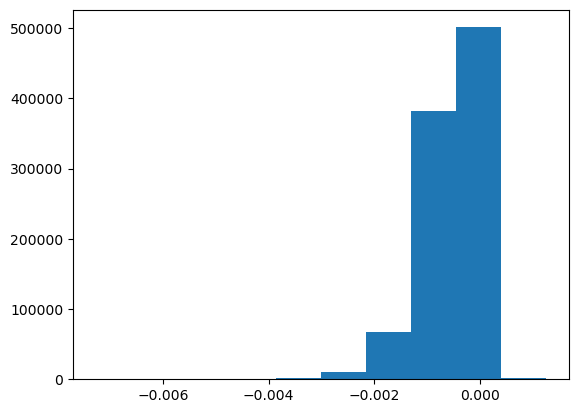

In [25]:
plt.hist( np.concatenate(samples) )

(array([1.0212e+04, 1.5945e+04, 5.2550e+03, 6.7500e+02, 6.8000e+01,
        1.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.00051573, 0.01694828, 0.03338082, 0.04981337, 0.06624592,
        0.08267847, 0.09911101, 0.11554356, 0.13197611, 0.14840865,
        0.1648412 ]),
 <BarContainer object of 10 artists>)

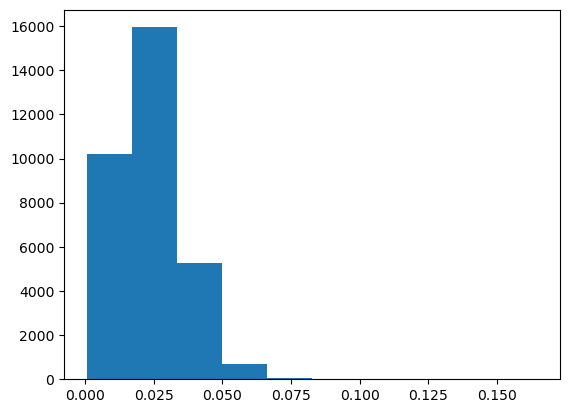

In [26]:
plt.hist(grad_norms)